# **8-1-1**

In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import seaborn as sns
%matplotlib inline

# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

Mounted at /content/drive


In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/StockData/F.csv')
df.set_index('Date', inplace=True)
df1 = df[['Close']]
df1

,Close
Date,
1/3/2012,11.13
1/4/2012,11.30
1/5/2012,11.59
1/6/2012,11.71
1/9/2012,11.80
...,...
11/30/2023,10.26
12/1/2023,10.58
12/4/2023,10.70


In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.33616619],
       [0.34419263],
       [0.3578848 ],
       ...,
       [0.31586402],
       [0.31114259],
       [0.31539188]])

In [4]:
# 4. Chia train, test, validation
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]


In [5]:
# Tạo mô hình Holt Winter
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)
# Fit mô hình với dữ liệu train
fitted_model = model.fit()
# Dự đoán với dữ liệu test
test_predictions = fitted_model.forecast(test_size)
# Dự đoán với dữ liệu validation
val_predictions = fitted_model.forecast(val_size)


In [6]:
# Forecast the next 30 days
forecast_next_30_days = fitted_model.forecast(steps=30)
forecast_next_30_days = scaler.inverse_transform(forecast_next_30_days.reshape(-1, 1))

forecast_next_30_days

array([[13.27367221],
       [13.27884148],
       [13.27566036],
       [13.28902383],
       [13.28908684],
       [13.29300757],
       [13.28      ],
       [13.27367221],
       [13.27884148],
       [13.27566036],
       [13.28902383],
       [13.28908684],
       [13.29300757],
       [13.28      ],
       [13.27367221],
       [13.27884148],
       [13.27566036],
       [13.28902383],
       [13.28908684],
       [13.29300757],
       [13.28      ],
       [13.27367221],
       [13.27884148],
       [13.27566036],
       [13.28902383],
       [13.28908684],
       [13.29300757],
       [13.28      ],
       [13.27367221],
       [13.27884148]])

In [7]:
# Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(test_predictions, test_data)
test_rmse = np.sqrt(mean_squared_error(test_predictions, test_data))
test_mape = mean_absolute_percentage_error(test_predictions, test_data)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(val_predictions, val_data)
val_rmse = np.sqrt(mean_absolute_error(val_predictions, val_data))
val_mape = mean_absolute_percentage_error(val_predictions, val_data)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 0.14020758507878125
Testing RMSE: 0.1904973506020779
Testing MAPE: 0.32025044709961037
---------------------------
Validation MAE: 0.056607561016444215
Validation RMSE: 0.2379234351980574
Validation MAPE: 0.12929649120194378


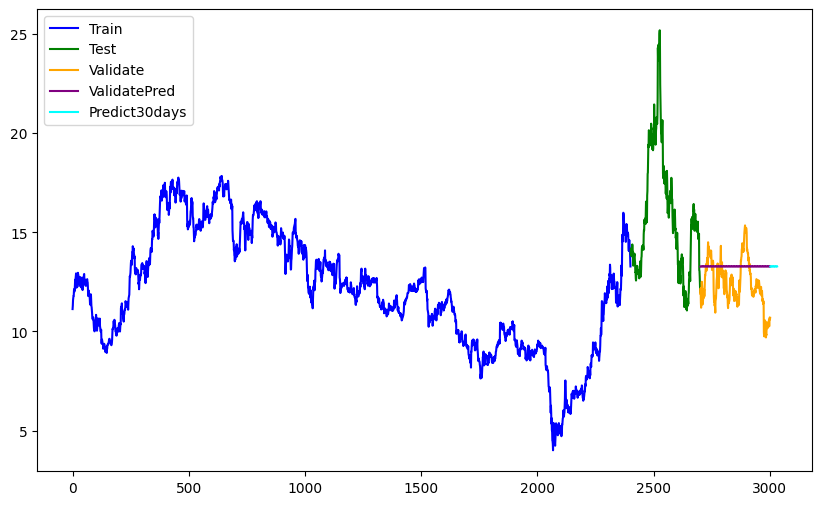

In [8]:
# Tạo các chỉ số cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_index = np.arange(0, train_size)
test_index = np.arange(train_size, train_size + test_size)
val_index = np.arange(train_size + test_size, len(df1))
next_30_days_index = np.arange(len(df1), len(df1) + 30)

# Đảo ngược lại quá trình scaling cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_data_original = scaler.inverse_transform(train_data.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data.reshape(-1, 1)).flatten()
val_data_original = scaler.inverse_transform(val_data.reshape(-1, 1)).flatten()
forecast_next_30_days_original = forecast_next_30_days.flatten()

# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Dữ liệu train
plt.plot(train_index, train_data_original, label='Train', color='blue')

# Dữ liệu test
plt.plot(test_index, test_data_original, label='Test', color='green')

# Dữ liệu validation
plt.plot(val_index, val_data_original, label='Validate', color='orange')

# Dự đoán cho dữ liệu validation
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
plt.plot(val_index, val_predictions, label='ValidatePred', color='purple')

# Dự đoán cho 30 ngày tiếp theo
plt.plot(next_30_days_index, forecast_next_30_days_original, label='Predict30days', color='cyan')

plt.legend()

plt.show()


# **7-2-1**


In [9]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import seaborn as sns
%matplotlib inline

# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/StockData/F.csv')
df.set_index('Date', inplace=True)
df1 = df[['Close']]
df1

,Close
Date,
1/3/2012,11.13
1/4/2012,11.30
1/5/2012,11.59
1/6/2012,11.71
1/9/2012,11.80
...,...
11/30/2023,10.26
12/1/2023,10.58
12/4/2023,10.70


In [11]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.33616619],
       [0.34419263],
       [0.3578848 ],
       ...,
       [0.31586402],
       [0.31114259],
       [0.31539188]])

In [12]:
# 4. Chia train, test, validation
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]


In [13]:
# Tạo mô hình Holt Winter
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)
# Fit mô hình với dữ liệu train
fitted_model = model.fit()
# Dự đoán với dữ liệu test
test_predictions = fitted_model.forecast(test_size)
# Dự đoán với dữ liệu validation
val_predictions = fitted_model.forecast(val_size)


In [14]:
# Forecast the next 30 days
forecast_next_30_days = fitted_model.forecast(steps=30)
forecast_next_30_days = scaler.inverse_transform(forecast_next_30_days.reshape(-1, 1))

forecast_next_30_days

array([[5.24854573],
       [5.23719084],
       [5.24133732],
       [5.23969529],
       [5.24181345],
       [5.23130722],
       [5.23999999],
       [5.24854573],
       [5.23719084],
       [5.24133732],
       [5.23969529],
       [5.24181345],
       [5.23130722],
       [5.23999999],
       [5.24854573],
       [5.23719084],
       [5.24133732],
       [5.23969529],
       [5.24181345],
       [5.23130722],
       [5.23999999],
       [5.24854573],
       [5.23719084],
       [5.24133732],
       [5.23969529],
       [5.24181345],
       [5.23130722],
       [5.23999999],
       [5.24854573],
       [5.23719084]])

In [15]:
# Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(test_predictions, test_data)
test_rmse = np.sqrt(mean_squared_error(test_predictions, test_data))
test_mape = mean_absolute_percentage_error(test_predictions, test_data)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(val_predictions, val_data)
val_rmse = np.sqrt(mean_absolute_error(val_predictions, val_data))
val_mape = mean_absolute_percentage_error(val_predictions, val_data)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 0.35449543166081693
Testing RMSE: 0.40961948580575785
Testing MAPE: 6.104430499497042
---------------------------
Validation MAE: 0.3402970169522465
Validation RMSE: 0.5833498238212184
Validation MAPE: 5.859901190613359


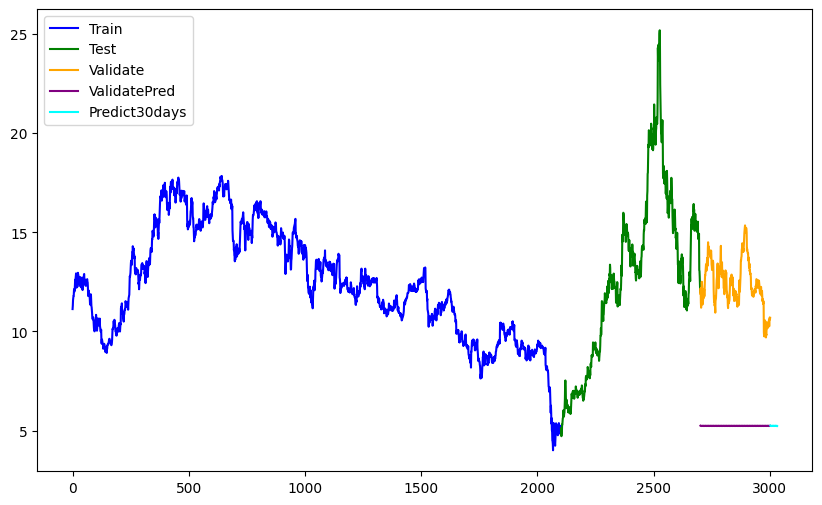

In [16]:
# Tạo các chỉ số cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_index = np.arange(0, train_size)
test_index = np.arange(train_size, train_size + test_size)
val_index = np.arange(train_size + test_size, len(df1))
next_30_days_index = np.arange(len(df1), len(df1) + 30)

# Đảo ngược lại quá trình scaling cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_data_original = scaler.inverse_transform(train_data.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data.reshape(-1, 1)).flatten()
val_data_original = scaler.inverse_transform(val_data.reshape(-1, 1)).flatten()
forecast_next_30_days_original = forecast_next_30_days.flatten()

# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Dữ liệu train
plt.plot(train_index, train_data_original, label='Train', color='blue')

# Dữ liệu test
plt.plot(test_index, test_data_original, label='Test', color='green')

# Dữ liệu validation
plt.plot(val_index, val_data_original, label='Validate', color='orange')

# Dự đoán cho dữ liệu validation
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
plt.plot(val_index, val_predictions, label='ValidatePred', color='purple')

# Dự đoán cho 30 ngày tiếp theo
plt.plot(next_30_days_index, forecast_next_30_days_original, label='Predict30days', color='cyan')

plt.legend()

plt.show()


# **6-2-2**

In [17]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import seaborn as sns
%matplotlib inline

# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/StockData/F.csv')
df.set_index('Date', inplace=True)
df1 = df[['Close']]
df1

,Close
Date,
1/3/2012,11.13
1/4/2012,11.30
1/5/2012,11.59
1/6/2012,11.71
1/9/2012,11.80
...,...
11/30/2023,10.26
12/1/2023,10.58
12/4/2023,10.70


In [19]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.33616619],
       [0.34419263],
       [0.3578848 ],
       ...,
       [0.31586402],
       [0.31114259],
       [0.31539188]])

In [20]:
# 4. Chia train, test, validation
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]


In [21]:
# Tạo mô hình Holt Winter
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)
# Fit mô hình với dữ liệu train
fitted_model = model.fit()
# Dự đoán với dữ liệu test
test_predictions = fitted_model.forecast(test_size)
# Dự đoán với dữ liệu validation
val_predictions = fitted_model.forecast(val_size)


In [22]:
# Forecast the next 30 days
forecast_next_30_days = fitted_model.forecast(steps=30)
forecast_next_30_days = scaler.inverse_transform(forecast_next_30_days.reshape(-1, 1))

forecast_next_30_days

array([[8.78656888],
       [8.78131992],
       [8.78597656],
       [8.78819703],
       [8.77448462],
       [8.78075164],
       [8.79      ],
       [8.78656888],
       [8.78131992],
       [8.78597656],
       [8.78819703],
       [8.77448462],
       [8.78075164],
       [8.79      ],
       [8.78656888],
       [8.78131992],
       [8.78597656],
       [8.78819703],
       [8.77448462],
       [8.78075164],
       [8.79      ],
       [8.78656888],
       [8.78131992],
       [8.78597656],
       [8.78819703],
       [8.77448462],
       [8.78075164],
       [8.79      ],
       [8.78656888],
       [8.78131992]])

In [23]:
# Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(test_predictions, test_data)
test_rmse = np.sqrt(mean_squared_error(test_predictions, test_data))
test_mape = mean_absolute_percentage_error(test_predictions, test_data)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(val_predictions, val_data)
val_rmse = np.sqrt(mean_absolute_error(val_predictions, val_data))
val_mape = mean_absolute_percentage_error(val_predictions, val_data)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 0.08796769803830234
Testing RMSE: 0.11772683561508417
Testing MAPE: 0.3902806107280446
---------------------------
Validation MAE: 0.2530761853289122
Validation RMSE: 0.5030667801881895
Validation MAPE: 1.1228062868218027


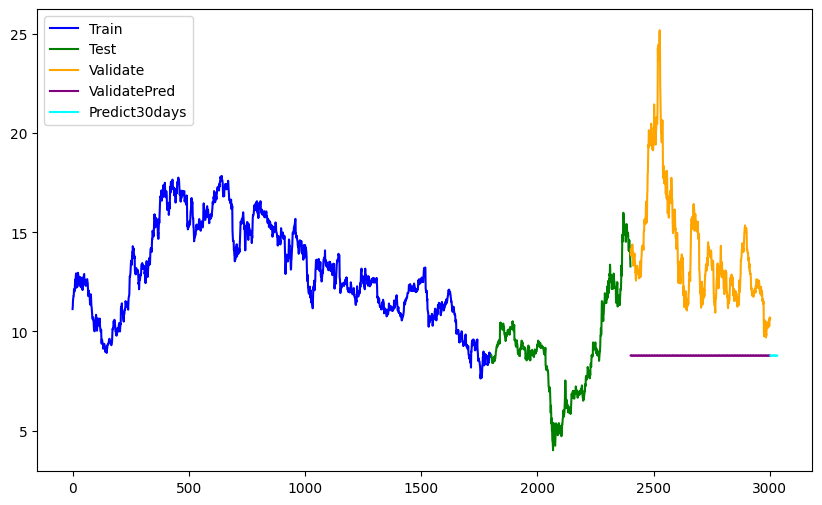

In [24]:
# Tạo các chỉ số cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_index = np.arange(0, train_size)
test_index = np.arange(train_size, train_size + test_size)
val_index = np.arange(train_size + test_size, len(df1))
next_30_days_index = np.arange(len(df1), len(df1) + 30)

# Đảo ngược lại quá trình scaling cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_data_original = scaler.inverse_transform(train_data.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data.reshape(-1, 1)).flatten()
val_data_original = scaler.inverse_transform(val_data.reshape(-1, 1)).flatten()
forecast_next_30_days_original = forecast_next_30_days.flatten()

# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Dữ liệu train
plt.plot(train_index, train_data_original, label='Train', color='blue')

# Dữ liệu test
plt.plot(test_index, test_data_original, label='Test', color='green')

# Dữ liệu validation
plt.plot(val_index, val_data_original, label='Validate', color='orange')

# Dự đoán cho dữ liệu validation
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
plt.plot(val_index, val_predictions, label='ValidatePred', color='purple')

# Dự đoán cho 30 ngày tiếp theo
plt.plot(next_30_days_index, forecast_next_30_days_original, label='Predict30days', color='cyan')

plt.legend()

plt.show()
